In [33]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [34]:
# 3️⃣ Load Dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    "data",  # Folder structure: data/ad/, data/not_ad/
    image_size=(256, 256),
    batch_size=8,
    label_mode='binary'
)

Found 62 files belonging to 2 classes.


In [35]:
# 4️⃣ Normalize Data
dataset = dataset.map(lambda x, y: (x / 255.0, y))

In [36]:
# 5️⃣ Train/Val/Test Split
total_batches = len(dataset)
train_size = int(total_batches * 0.7)
val_size = int(total_batches * 0.2)

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size)

In [37]:
# 6️⃣ CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:

# 7️⃣ Train the Model
history = model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.4326 - loss: 1.1540 - val_accuracy: 0.5000 - val_loss: 0.6584
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - accuracy: 0.5816 - loss: 0.6533 - val_accuracy: 0.5000 - val_loss: 0.7018
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.5677 - loss: 0.6816 - val_accuracy: 0.3750 - val_loss: 0.6934
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.6222 - loss: 0.6885 - val_accuracy: 0.6250 - val_loss: 0.6505
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.7635 - loss: 0.6581 - val_accuracy: 0.6250 - val_loss: 0.6383
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.7312 - loss: 0.5853 - val_accuracy: 1.0000 - val_loss: 0.5001
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.6847 - loss: 0.6233 - val_accuracy: 0.8750 - val_loss: 0.4723
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.9212 - loss: 0.4418 - val_accuracy: 0.8750 - val_loss:

In [41]:
# 8️⃣ Evaluate the Model
test_loss, test_acc = model.evaluate(test)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9107 - loss: 0.4587

🎯 Test Accuracy: 92.86%


In [42]:
# 9️⃣ Save and Load Model
model.save("financial_ad_detector_cnn_model.h5")
model = load_model("financial_ad_detector_cnn_model.h5")

In [43]:
# ✅ Prediction Function
def predict_block(img_block):
    img_block = cv2.resize(img_block, (256, 256))
    img_block = img_block / 255.0
    img_block = np.expand_dims(img_block, axis=0)
    pred = model.predict(img_block, verbose=0)
    return "Advertisement" if pred[0][0] > 0.5 else "Not an Ad"

In [44]:
# ✅ Improved Block Detection

def detect_text_blocks(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)
    contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_blocks = []
    for cnt in sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1]):
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 50 and h > 50:
            detected_blocks.append((x, y, w, h))
    return detected_blocks

📟 Total Detected Blocks: 3
📢 Advertisements: 2
📄 Non-Ads: 1


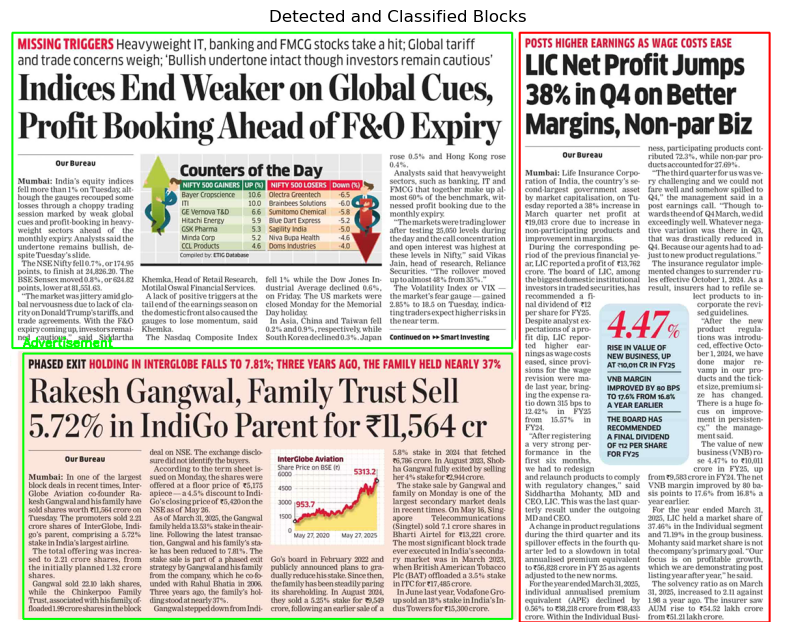

In [47]:
# ✅ Final Full Page Analyzer

def analyze_full_image_blocks(image_path):
    img = cv2.imread(image_path)
    original_img = img.copy()
    blocks = detect_text_blocks(image_path)

    ad_count = 0
    non_ad_count = 0

    for (x, y, w, h) in blocks:
        block_img = img[y:y+h, x:x+w]
        prediction = predict_block(block_img)

        color = (0, 255, 0) if prediction == "Advertisement" else (0, 0, 255)
        label = prediction
        if prediction == "Advertisement":
            ad_count += 1
        else:
            non_ad_count += 1

        cv2.rectangle(original_img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(original_img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    total = ad_count + non_ad_count
    print(f"📟 Total Detected Blocks: {total}")
    print(f"📢 Advertisements: {ad_count}")
    print(f"📄 Non-Ads: {non_ad_count}")

    plt.figure(figsize=(10, 12))
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detected and Classified Blocks")
    plt.show()

# ▶️ Run on Sample
analyze_full_image_blocks("trail.png")
